---
title: Structural Transformation Notes
author: Jonathan Conning
---


The following are notes on general equilibrium modeling of the process of structural transformation.  Some of the presentation illustrates and expands upon this short useful survey:

> Matsuyama, K., 2008. Structural change. in Durlauf and Blume eds. *The new Palgrave dictionary of economics* 2, pp.

The note is organized around the following sections:

- Market Clearing Neo-Classical Models
   - Push out of agriculture vs. Pull into Manufacturing
   - Pull in an Open Economy Model
   - Push in Closed Economy with Non-homothetic preferences
- Productivity growth caused by structural change
- Impediments to structural change
- Spillovers, Complementarities, and Multiple Equilibria   
   

## Market Clearing Neo-Classical Models

Here we seek to explain structural transformation and the accompanying movement of labor out of agriculture and into other sectors in a market-clearing neo-classical model with no market failures.  In these model the marginal value product of labor is the same in both agriculture and manufacturing, hence there is no 'dualism' due to market frictions of one kind or another.

Matsuyama builds a very simple neo-classical model with two sectors (in effect a specific factors model).  

**Production**

Sector $j \in (1,2)$ is given by $Y_j = A_j \cdot F_j(n_j)$. Let $j=1$ be the primary (agricultural) sector and $j=2$ the secondary (manufacturing) sector, where $A_j$ represents Total Factor Productivity (TFP) in each sector. We normalize the size of the population to 1. Then, if $n$ is the share (and total) labor used in sector 1 then $1-n$ is the amount left to be in sector two.  

Matsuyama refers to $F$ only as a generic increasing concave function, but for purposes of the graph examples, let's specify production in the two sectors as:

$$
\begin{align*}
A_1 F_1(n) &= A_1 n^\alpha  \\
A_2 F_2(1-n) &= A_2 (1-n)^\nu  
\end{align*}
$$

wehre sector 1 is the primary (agriculture) sector and sector 2 is the secondary (manufacturing) sector.  The parameters $\alpha$ and $\nu$ are both between 0 and 1.  The production functions are increasing in labor and concave.

Competitive markets will insure that labor is efficiently allocated across sectors such that the marginal value product of labor be equalized in each sector:
    
$$
A_1 F_1^\prime (n) = p A_2 F_2^\prime (1-n)
$$

where $p=P_2/P_1$ is the relative price of sector 2 goods.

We can trace out a production possibility frontier (PPF) by simply plotting $\left( A_1 F_1(n), A F_2(1-n) \right)$ as we vary labor in agriculture $n$ from 0 to 1. Below we draw two PPFs.  One with $A_1=A_2=1$ and another afteragricultural TFP has improved to $A_1=1.2$  (we are setting $\alpha=\nu=1/2$)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

In [2]:
def F(n, a):
    return  n ** a

def Fprime(n, a):
    return a* n ** (a-1)


def PPF(A1=1, A2=1, a1=0.6, a2=0.4, ax=None):   
    if ax is None:
        ax = plt.gca()
    n = np.linspace(0,1,50)
    plt.plot( A1*F(n, a1), A2*F(1-n, a2) )
    plt.xlabel(r'$Y_1$'), plt.ylabel(r'$Y_2$')

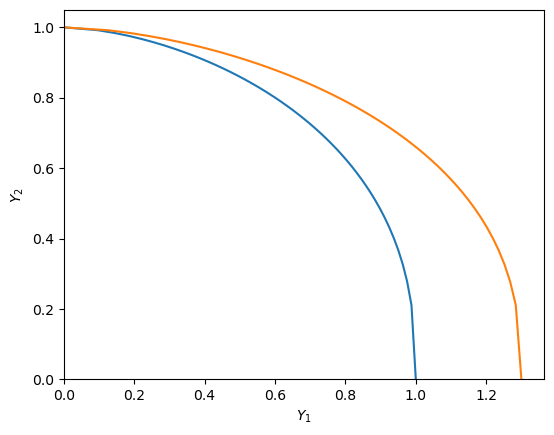

In [3]:
fig, ax = plt.subplots(1)
PPF(A1=1, A2=1, ax=ax)
PPF(A1=1.3, A2=1, ax=ax)
ax.set_xlim(left=0), ax.set_ylim(bottom=0)
ax.set_aspect('equal')

### Labor Push and/or Pull

The large literature on structural transformation often distinguishes between forces that 'Push' or 'Pull' labor out of agriculture. 

'Pull' could come about, for example, via an increase over time of the relative price of manufactures $p$, or an increase in relative TFP $A_2/A_1$. These have the effect of shifting out the demand for labor (the marginal value product or labor curve $p A_2 F_2^\prime (1-n)$ relative to that in agriculture, leading to an incipient rise in the manufacturing wage that transforms the economy by attracting labor to that sector.

As demonstrated below, it's easy to illustrate Pull effects in this economy with standard homothetic preferences in either the open or closed economy.

The 'Push' argument is associated the idea that rises in agricultural productivity $A_1$ will mean that more food can be produced with fewer workers and therefore that labor can be 'released' from agriculture to other sectors. A related prevalent view is than an 'agricultural revolution' is often a prior and necessary condition for an industrial revolution.  

This effect fails to emerge in this standard neo-classical model because, as we've just argued, raising the relative productivity in a sector tends *increase* demand for labor unless the relative price of the good happens to simultaneously fall by enough to reverse that effect. One way to engineer such an effect is to assume non-homothetic preferences to rise to a form of Engel's law or that manufactures have a higher income elasticity of demand, such that the agricultural terms of trade deteriorate against agriculture as incomes expand.   We explore this idea in {ref}`nonhomothetic` section below.

### An Open Economy with Homothetic Preferences

In the open-economy version of this model, the relative price of manufactured goods $p$ is set and fixed on world markets and hence does not change during the period of analysis. We can focus on the optimum production allocation without worrying about preferences, because agents first maximize the value of income at world prices and then choose optimum consumption baskets.

We can plot labor demand in each sector and solve for the equilibrium labor allocation $n^*$ that solves:

$$
A_1 F_1^\prime (n) = p A_2 F_2^\prime (1-n)
$$

We solve for the equilibrium wage numerically by solving for the $n$ that satisfies these first-order conditions and then use either marginal product to solve for the equilibrium wage. 

In [4]:
def weq(A1=1, A2=1, a1=0.5, a2=0.5, p=1):
    
    def foc(n):
        return  p * A2 * Fprime(1-n, a2) - A1 * Fprime(n, a1) 
    
    n = 0.75 # guess
    ne = fsolve(foc, n)[0]
    we = A1 * Fprime(ne, a1)
    return ne, we


def sfm(A1=1, A2=1, a1=0.5, a2=0.5, p=1, ax=None):
    if ax is None:
        ax = plt.gca()
    nn = np.linspace(0.01, 0.99, 100)
    ax.plot(nn, A1 * Fprime(nn, a1))
    ax.plot(nn, p * A2 * Fprime(1-nn, a2))
    ne, we = weq(A1, A2, a1, a2, p)
    ax.scatter(ne, we)
    ax.axhline(we, linestyle =':')
    ax.vlines(x = ne, ymin=0, ymax=we, linestyle =':')
    ax.set_ylim(0,2)
    ax.set_xlim(0,1)
    ax.set_xlabel(r'$n$')
    ax.text(0.8, 0.9*A1 *Fprime(1,a1), r'$L_1^d$')
    ax.text(0.1, 0.9*p*A2 *Fprime(0.999, a2), r'$L_2^d$')

**Pull: Impact of increase in relative price of manufactures in open Economy**

Note $p=\frac{P_m}{P_a}$ measures the relative price of manufactures in terms of agricultural goods. $w/P_m$ measures the real wage in terms of manufactures and $w/P_a$ the real wage in terms of agricultural goods.

The next diagram shows the effect of raising the relative price of manufactures from $p=1$ to $p=1.2$ as might occur in an open economy due to changing world prices.  

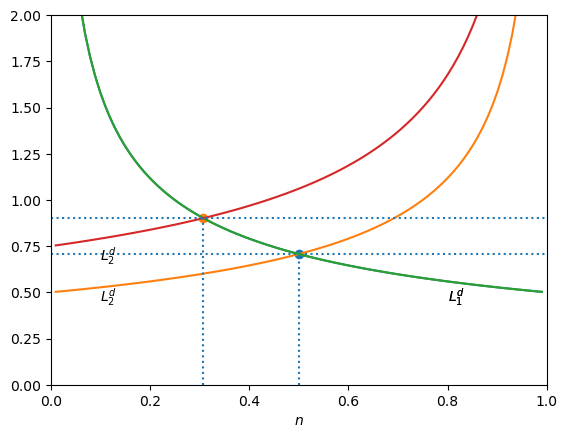

In [5]:
sfm(p=1)
sfm(p=1.5)

Exogenously driven increases in the relative productivity of manufactures drives this 'pull' effect. As Matsuyama explains, this is the sort of mechanism envisioned by Lewis (1954) although the Lewis model also has a form of dualism not captured here.  In particular, we can see (from the diagram above) that in these models the expansion of one sector can be choked off by a rising wage. Lewis' assumption of "unlimited supplies of labor" in agriculture amounts to saying that there will be a very elastic supply of labor aso wages will not be fast to rise.

Note also that this is exactly like a specific factors model diagram which allows us to say more about how relative factor rewards change. The diagram above we shows the effect of raising the relative price of manufactures $p=\frac{P_m}{P_a}$ from 1 to 1.5.  This has the effect of shifting out the demand for labor in manufacturing and pulling labor out of agriculture.  We know from the specific factors model that the effect of the rise in the relative price of manufactures on the consumption real wage is ambiguous (the so-called 'Neo-classical ambiguity' result).  The real wage in terms of manufactures falls (the nominal wage $w$ rises by less than the rise in $P_m$ due diminishing productivity as we draw resources into manufacturing), but the real wage in terms of agricultural goods rises.  The net effect on the real wage depends on consumption shares.


(nonhomothetic)=
### Closed Economy with Non-homothetic preferences

In a **closed economy** the relative price $p$ is determined endogenously by a tangency between the PPF and the representative indifference curve. As mentioned above, we'll need non-homothetic preferences in order to get the kind of 'Push' effect used in Gollin et al (2002):

The consumer has Stone-Geary preferences of the form:

$$
U(C_1, C_2) = \beta \cdot \log(C_1 - \gamma) + \log(C_2)
$$

If $\gamma=0$ these would be standard homothetic preferences with linear income expansion paths (i.e. consumers maintain consumption ratio $C_2/C_1$ as income expands). When $\gamma>0$ preferences are non-homothetic.  We interpret $\gamma$ as a minimum agricultural (food) consumption requirement.  At low levels of income, all income is devoted to satisfying the requirement, but once that level is reached, remaining income will be spent in constant expenditure shares:

$$
\begin{align*}
C_1 - \gamma &= \frac{\beta}{1+\beta} \frac{Y}{P_1}  \\
C_2 &= \frac{1}{1+\beta} \frac{Y}{P_2}
\end{align*}
$$

Define $p=P_2/P_1$ as the relative price of good 2, then $C_1$ and $C_2$ will be consumed proportional to each other following: 

$$
C_1 =\gamma + (\beta p) C_2
$$

Below is a plot of the optimum $C_2/C_1$ ratio for homothetic (blue, $\gamma=0$) and non-homothetic (orange, $\gamma=1$) preferences. In the latter case, after income reaches the level at which subsistence food needs are satisfied, the $C_2/C_1$ ratio (think of a ray from origin to a point on orange line) increases as incomes expand.

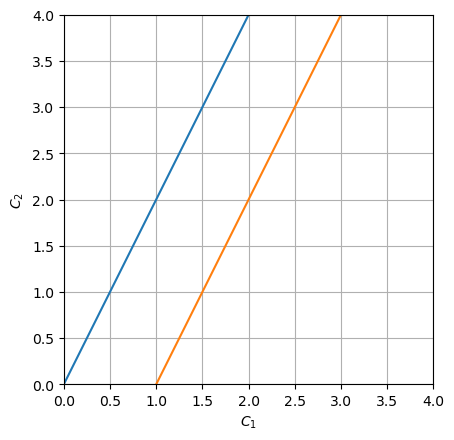

In [6]:
c1 = np.linspace(0,4,100)
def c2(c1, gam, beta, p):
    return  (c1 - gam)/(beta * p)

plt.plot(c1, c2(c1, 0, 0.5, 1))
plt.plot(c1, c2(c1, 1, 0.5, 1))
plt.ylim(0, 4), plt.xlim(0, 4)
plt.xlabel(r'$C_1$'), plt.ylabel(r'$C_2$')
plt.grid()
plt.gca().set_aspect('equal')


We're looking for a tangency between the PPF and the representative agent's indifference curve, equal to the common price ratio. This $MRS = p= MPT$ condition can be written:

$$
\frac{1}{\beta} \frac{C_1 - \gamma}{C_2} = p = \frac{A_1 F_1^\prime (n)}{A_2 F_2^\prime (1-n)} 
$$

Using the fact that a closed economy must produce what it consumes we can substitute $C_1 = A_1 F_1(n)$ and $C_2 = A_2 F_2(1-n)$ and manipulate to obtain condition (2) in Matsuyama:

$$
F_1(n) - \frac{\beta F_2(1-n) F_1 ^\prime (n)}{F_2 ^\prime (1-n)} = \frac{\gamma}{A_1}
$$


This implicitly defines $n$ as a decreasing function of $A_1$.  Two things are striking here (both partly consequences of the Cobb-Douglas):

1) $A_2$ plays no role. As $A_2$ rises $p$ falls by just enough to offset, leaving relative demand for labor unchanged.

2) At any $\gamma >0$ the agricultural labor share $n$ will fall with $A_1$. This is the Push effect.

In the plot below we plot this left hand side in red. The dashed line represents a value of $\frac{\gamma}{A_1}$. We can see that if $A_1$ rises (the dashed line moves down) the new equilibrium will involve less agricultural labor $n$.

In [7]:
def lhs(n, a1, a2, beta):
    F1 =  F(n, a1)
    dF1 = Fprime(n, a1)
    F2 =  F(1-n, a2)
    dF2 = Fprime(1-n, a2)
    return F1 - (beta*F2*dF1)/dF2  

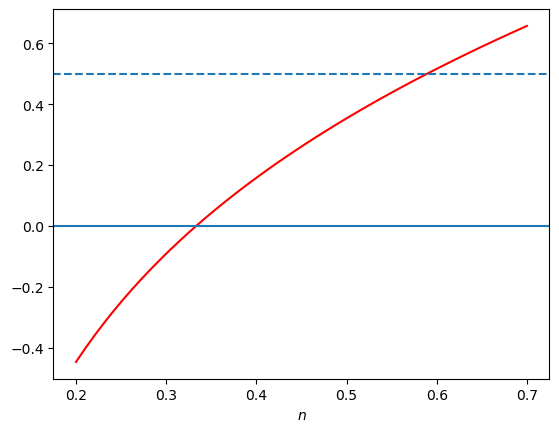

In [8]:
n = np.linspace(0.2,0.7,50)
plt.plot(n, lhs(n, 0.5, 0.5, 0.5), color='r')
plt.axhline(0);
plt.axhline(0.5, linestyle='--')
plt.xlabel(r'$n$');

We can solve for the closed economy equilibrium and plot things on a PPF diagram.

In [9]:
def neq(A1=1, a1=0.5, a2=0.5, beta=0.5, gamma= 0.5):
    '''Closed economy eqn from MRS=MPT'''
    def foc(n):
        return  lhs(n, a1, a2, beta) - gamma/A1
    
    n = 0.7 # guess
    ne = fsolve(foc, n)[0]
    return ne

In [10]:
def plot_opt(A1, A2, a1, a2, beta, gamma):
    ne = neq(A1, a1, a2, beta, gamma)
    Y1 = A1 * F(ne, a1)
    Y2 = A2 * F(1-ne, a2)
    p = (1/beta)  * (Y1-gamma)/Y2
    print(f'A1={A1}, n={ne:0.2f}, p={p:0.2f}')
    plt.scatter(Y1, Y2)
    ax =plt.gca()
    PPF(A1=A1, A2=A2, a1=a1, a2=a2, ax=ax)

Here we see structural transformation and a rise in the relative price of manufactures as TFP in agriculture increases (the slope of the tangent relative price line gets flatter as the PPF pushes out):

A1=1, n=0.58, p=0.70
A1=2, n=0.48, p=1.63


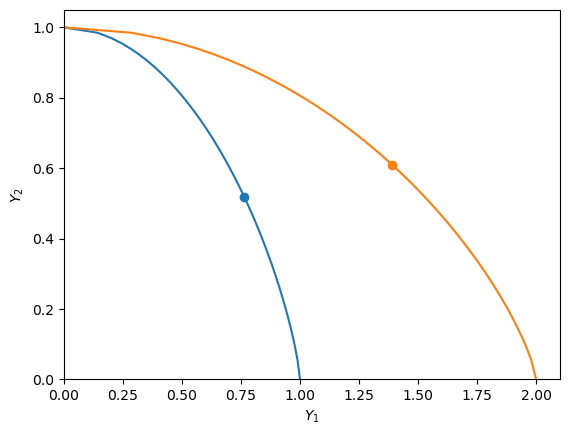

In [11]:
plot_opt(1, 1, 0.5, 0.75, 1, 0.4)
plot_opt(2, 1, 0.5, 0.75, 1, 0.4)
plt.xlim(left=0)
plt.ylim(bottom=0);

### Productivity growth caused by Structural Change

Matsuyama adds dynamics to the sort of model described above by assuming that TFP growth in manufacturing might respond to "the stock of experience accumulated [in that sector]... through learning-by-doing."  He captures this by positing that TFP in the sector in period $t$ is given by:

$$
A_{2t} = A(Q_t)
$$

where $Q_t$ is the stock of experience which follows this law of motion:

$$
\frac{dQ_t}{dt} = H(1-n_t)
$$

where $H(\cdot)$ is an increasing function. He assumes a critical level of manufacturing employment $(1-n_c)$ at which H(1-n_c)=0 (and negative at values below).  With these assumptions and if $n<n_c$ so the critical threshold is surpassed, this plus the earlier closed economy model leads to a version of the **'Staple Theory of Growth'** whereby growth in the agricultural sector releases labor to manufacturing which over time generates productivity growth there.  

The **Staples Thesis** of Growth (Innis, Watkins, others) emphasizes the role of the expansion of frontiers and the growth of traditional 'staple' products such as wheat in a resource-rich economies. This has been used to explain growth and development in regions of the world including Canada, northern United States, and to some extent Australia, New Zealand and Argentina.  These countries benefited from an extraordinary rise in commodity prices in the late 19th century which, by many accounts led to the growth of supporting manufacturing industries, in a manner similar to that captured by this account.

Matsuyama points out however that a variation on the same model can explain a version of the **resource curse**.  For example in the small open economy the equilibrium condition is as above:

$$
A_1 F_1^\prime (n_t) = p A(Q_t) F_2^\prime (1-n_t)
$$

As discussed before, raising $A_1$ implies higher $n_t$ for any level of $Q_t$.  If the economy is already passed the threshold $H(1-n_t)>0$ which leads to growth in manufacturing and hence pull out of agriculture, and the effect is self-reinforcing.

However if below the threshold (i.e. $n_t>n_c$) and hence $H(1-n_t)<0$ anything that stimulates agriculture, be it productivity growth or a rise in the relative price of agricultural products, will lead to productivity *decline* in industry and a steady increase in agricultural employment $n_t$.

This is a version of the so called *staple-trap,* *resource curse,* or *dutch disease*.  Matsuyama (1992) models this type of possibility in richer detail.

### Impediments to structural change

Many studies have modeled impediments to the re-allocation of labor across sectors.   

The most famous of these is the Lewis model which assumes workers in the agricultural sector earn an average product of labor there, leading to overemployment in the sector.  We'll see several models that try to make sense of this, for example models that attribute this to land property rights insecurity. 

Hayashi and Prescott (2008) argue that agricultural employment in Japan remained virtually constant at 14 million persons from 1885 to WWII (see image below) despite significant expansion in industrial technology capacity in that period. They argue that labor could not easily leave agriculture due to patriarchal customs and norms that made it hard for children of agricultural households to leave the parental household).  Using a calibrated general equilibrium model, the authors argue that the lifting of that barrier in the post-war era (due to various factors including legislation surrounding deep land reforms) explains a good part of the post-war Japanese miracle. 

<img src="../media/Japan_agemp.png" alt="Japan Ag employment" class="bg-primary" width="600px">

There are many other models with barriers or frictions in the structural transformation.  One famous model that received a lot of attentiun is the Harris and Todaro (1970) model.  See the separate notebook on this model. 

### Spillovers, Complementarities, and Multiple Equilibria 

Coming soon.

## References Cited

Harris, J.R., Todaro, M.P., 1970. Migration, unemployment and development: a two-sector analysis. *The American economic review* 126–142.

Hayashi, F., Prescott, E.C., 2008. The depressing effect of agricultural institutions on the prewar Japanese economy. *Journal of political Economy* 116, 573–632.

Lewis, W.A., 1954. Economic development with unlimited supplies of labour. *The Manchester School* 22, 139–191.

Matsuyama, K., 2008. Structural change. *The new Palgrave dictionary of economics* 2.

Matsuyama, K., 1992. Agricultural productivity, comparative advantage, and economic growth. *Journal of economic theory* 58, 317–334.

